In [1]:
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import random
sns.set()
%matplotlib inline
plt.rcParams["figure.figsize"] = (16,9)

Text(0, 0.5, '$\\rho$')

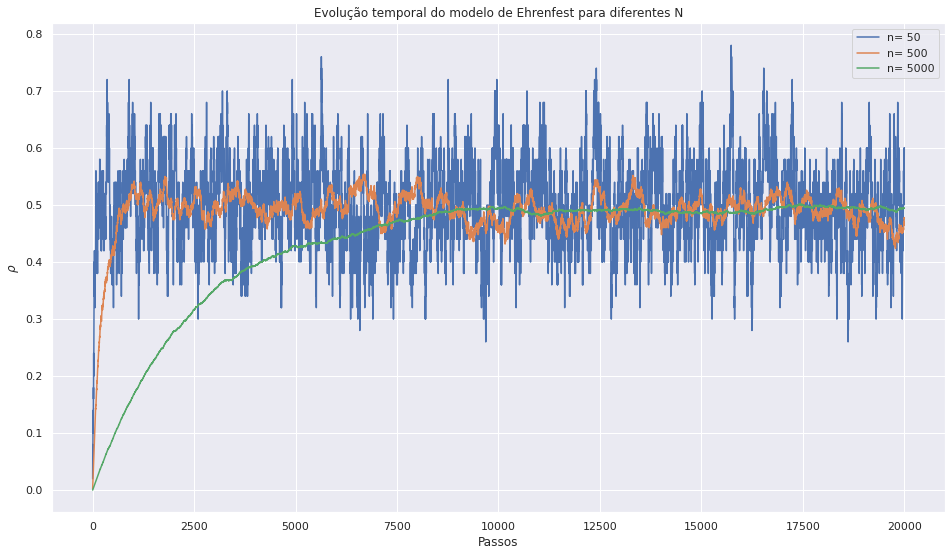

In [8]:
t = 20000
plt.rcParams["figure.figsize"] = (16,9)

for n in [50, 500, 5000]:
  pulgas = np.zeros(n)
  soma =[]
  for i in range(t):
    
    p = int(random.random() * n)
    pulgas[p] = (pulgas[p]+1)%2
    soma.append(np.sum(pulgas)/n)

  plt.plot(range(t), soma, label='n= ' +str(n))


plt.title('Evolução temporal do modelo de Ehrenfest para diferentes N')
plt.legend()
plt.xlabel('Passos')
plt.ylabel(r'$\rho$')

In [19]:
tf = 500000
t = np.arange(0, tf)

dts = [10, 100, 1000, 2000, 5000, 10000]

n = 1000


mediadts = []
errodts = []

for dt in dts:

  soma = np.zeros(tf)
  pulgas = np.zeros(n)
  med = []
  somadt = []
  for i in t:
    p = int(random.random() * n)
    pulgas[p] = (pulgas[p]+1)%2
    if i > 3*n: 
      soma[i] = (np.sum(pulgas)/n)

      if (i-3*n)%dt == 0:
        somadt.append(soma[i]) 
  media  = np.mean(somadt)
  media2 = np.mean(np.array(somadt)**2)
  sigma = np.sqrt(((media2) - ((media)**2))/(len(somadt)-1))
  mediadts.append(media)
  errodts.append(sigma)


#time = t - 3*n


    

#plt.xlim([0, np.max(time)])
#plt.plot(time, soma, label='n= ' +str(n))

Text(0, 0.5, '$\\overline{\\rho}$')

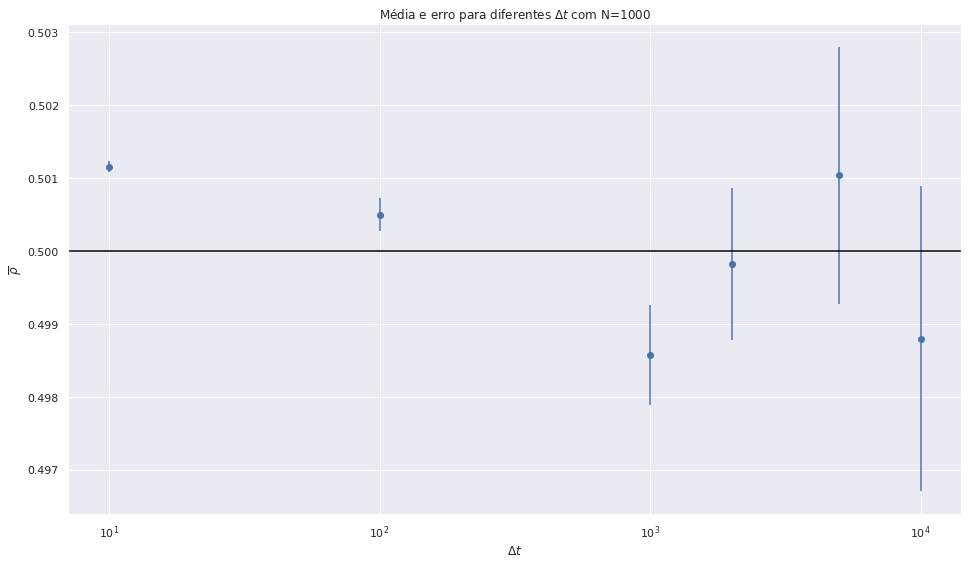

In [20]:
#titulo, N= , para dt distintos
plt.title(r'Média e erro para diferentes $\Delta t$ com N=1000')
plt.errorbar(dts, mediadts, yerr=errodts, fmt='o')
plt.xscale('log')
plt.axhline(0.5, color='black')
plt.xlabel(r'$\Delta t$')
plt.ylabel(r'$\overline{\rho}$')
#plt.scatter(dts, mediadts)

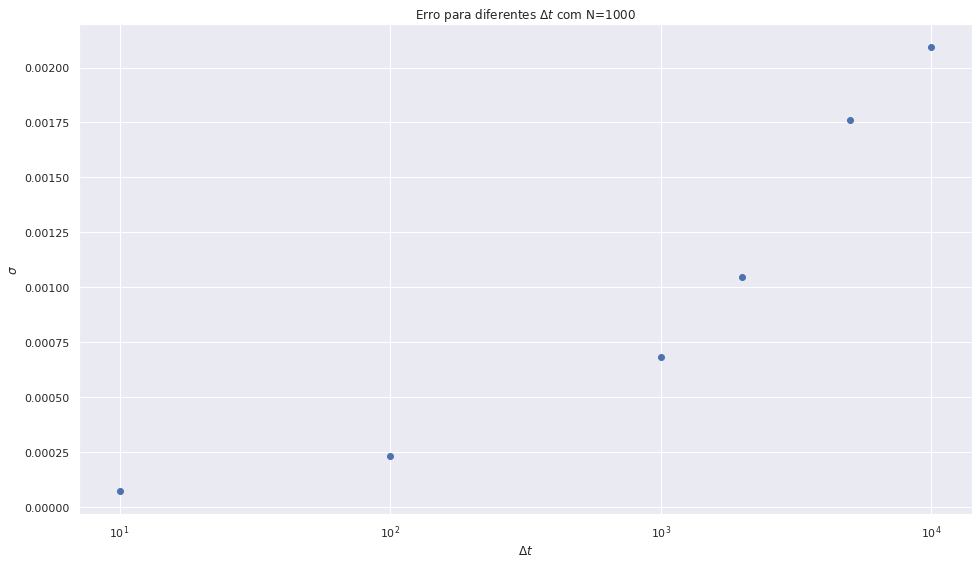

In [21]:
# ylabel sigma
plt.title('Erro para diferentes $\Delta t$ com N=1000')
plt.xlabel(r'$\Delta t$')
plt.ylabel(r'$\sigma$')
plt.scatter(dts, errodts)
plt.xscale('log')
